In [ ]:
import os
import csv
import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#csv file path
path='/content/drive/My Drive/Colab Notebooks/security/data'
fullpath=os.path.join(path, 'total.csv')
# 8:2=train:test
dataset = pd.read_csv(fullpath)
#dataset= dataset.dropna(axis=0)
dataset = dataset.replace([np.inf, -np.inf],1)
dataset = dataset.replace([np.nan],0)
x_data=dataset.iloc[:,:-1]
y_data=dataset.iloc[:,[-1]]
del x_data['Dst Port']
del x_data['Timestamp']

#x_data = x_data.astype(np.float32)
#np.any(np.isnan(x_data))
#np.all(np.isfinite(x_data))
#8:2=train:test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
x_train.dtypes

sc = StandardScaler()
sc.fit(x_train)

x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)




/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
#training
forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_train, y_train)
 
#predict
y_pred = forest.predict(x_test)
print(y_pred)
print(list(y_test))
 
# check accuracy
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


['Benign' 'FTP-BruteForce' 'Benign' ... 'Bot' 'Bot' 'DDOS attack-HOIC']
['Label']
정확도 : 0.8939943410512892


In [ ]:
from sklearn import tree
DT = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
DT.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_tr = DT.predict(x_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

Accuracy: 0.81


In [ ]:
names=list(x_data)
print(names)

['Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Av

In [ ]:
from sklearn.tree import export_graphviz

# .dot export
export_graphviz(DT, out_file='tree.dot',feature_names=names, class_names=['Benign','Brute Force -Web','Brute Force -XSS','SQL Injection','Infilteration','Bot','DDOS attack-LOIC-UDP','DDOS attack-HOIC','FTP-BruteForce'])

# .dot -> .png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])

# print .png at jupyter notebook
from IPython.display import Image
Image(filename = 'decistion-tree.png')

In [ ]:
chkpath=os.path.join(path, 'DoS_unlabeled.csv')
df = pd.read_csv(chkpath)
df = df.replace([np.inf, -np.inf],1)
df = df.replace([np.nan],0)
del df['Dst Port']
del df['Timestamp']
df = sc.transform(df)
predicted= DT.predict(df)
pre=[]
for idx in range(len(df)):
  if predicted[idx]!='Benign':
    pre.append(0)
  else:
    pre.append(1)
#abnormal=0/normal=1
answer=[0]*len(df)



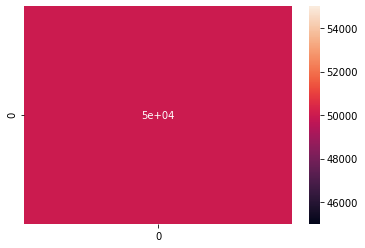

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

confusion_mat=confusion_matrix(answer,pre)
import seaborn as sns
sns.heatmap(confusion_mat, annot=True)

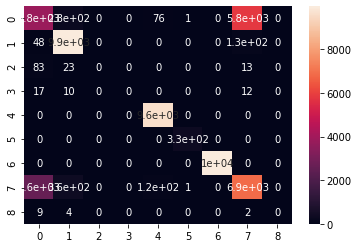

In [ ]:
confusion_mat2=confusion_matrix(y_test, y_pred_tr)
sns.heatmap(confusion_mat2, annot=True)